In [8]:
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd

subdf = pd.read_csv('RolexSubmarinerListings_Yearly.csv')
sampledf = pd.read_csv('2020Submariner_50s.csv')
sampledf = pd.read_feather('ListingDB.feather').set_index('index')
sampledf

,Unnamed: 0,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,...,Water resistance,Year,name,price,url,Code,Others,Thickness,Buckle width,Country
0,15269328.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,24218.0,https://www.chrono24.com.au/rolex/15269328.htm,NaN,NaN,NaN,NaN,Hong Kong
1,15128403.htm,Available now,3130,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020 (Approximation),Rolex Submariner (No Date),14209.0,https://www.chrono24.com.au/rolex/15128403.htm,NaN,NaN,NaN,NaN,United States of America
2,15079733.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,18035.0,https://www.chrono24.com.au/rolex/15079733.htm,NaN,NaN,NaN,NaN,Italy
3,15293129.htm,Available now,NaN,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date Neuwertig LC100 116610LN...,19218.0,https://www.chrono24.com.au/rolex/15293129.htm,CW 4718,NaN,NaN,NaN,Germany
4,15250965.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,19839.0,https://www.chrono24.com.au/rolex/15250965.htm,NaN,NaN,NaN,NaN,Switzerland
5,15051762.htm,Available now,NaN,Basic Info,NaN,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner No-Date NEW,16997.0,https://www.chrono24.com.au/rolex/15051762.htm,23303,Others,12.5 mm,NaN,The Netherlands
6,15244637.htm,Available now,NaN,Basic Info,Ceramic,Gold/Steel,Gold/Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,22689.0,https://www.chrono24.com.au/rolex/15244637.htm,NaN,NaN,NaN,NaN,United States of America
7,15278197.htm,NaN,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,23071.0,https://www.chrono24.com.au/rolex/15278197.htm,2825,NaN,NaN,NaN,United States of America
8,15179064.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date,20247.0,https://www.chrono24.com.au/rolex/15179064.htm,NaN,NaN,NaN,NaN,Germany
9,15132191.htm,NaN,NaN,Basic Info,Ceramic,Gold/Steel,Gold/Steel,Bracelet/strap,Rolex,Caliber,...,30 ATM,2020,Rolex Submariner Date 116613LN full stikers fu...,23139.0,https://www.chrono24.com.au/rolex/15132191.htm,NaN,NaN,NaN,NaN,Spain


In [4]:
from sklearn import tree

res = sampledf[['Reference number','Bezel material','Bracelet material','Case material','Clasp','Crystal','Dial','Movement/Caliber','Number of jewels']].dropna(how='any')

X=pd.get_dummies(res[['Bezel material','Bracelet material','Case material','Clasp','Crystal','Dial','Movement/Caliber','Number of jewels']])
y=res['Reference number']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

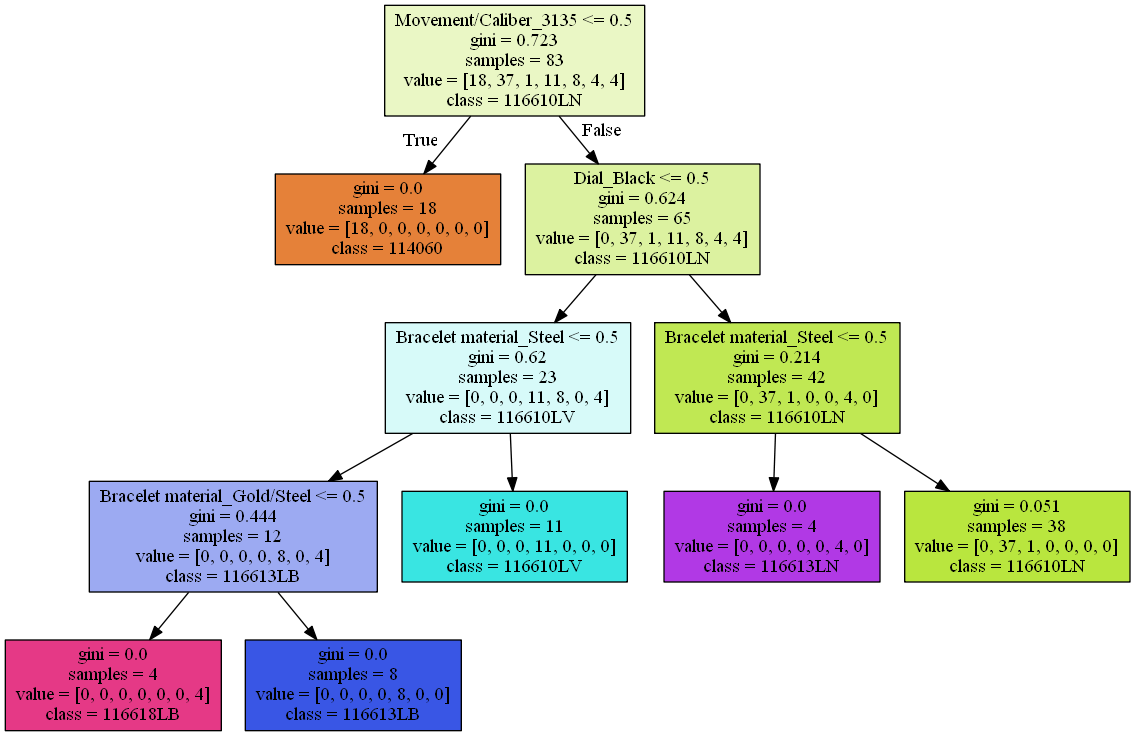

In [5]:
from io import StringIO
import os
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn import tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=X.columns, class_names=y.drop_duplicates().sort_values().values, filled=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
sampledf.loc[
    ~(sampledf['Movement/Caliber'] == '3130')&
    (sampledf['Reference number'] == '116610LV')&
    (sampledf['Dial'] == 'Black')&
    (sampledf['Bracelet material'] == 'Steel')
]

,Unnamed: 0,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,Case,Case diameter,Case material,Clasp,Clasp material,Condition,Crystal,Dial,Dial numerals,Expected delivery,Functions,Gender,Listing number,Location,Model,Movement,Movement/Caliber,Number of jewels,Payment Method,Power reserve,Reference number,Scope of delivery,Water resistance,Year,name,price,url,Code,Others,Thickness,Buckle width,Country
0,15269328.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Steel,Fold clasp,Steel,"New (Brand new, without any signs of wear)",Sapphire crystal,Black,No numerals,"Jun 17, 2020 - Jun 29, 2020",Functions,Men's watch/Unisex,939W08,"Hong Kong, TST East Kowloon",Submariner Date,Automatic,3135,31.0,Bank transfer,48 h,116610LV,"Original box, original papers",30 ATM,2020,Rolex Submariner Date,24218.0,https://www.chrono24.com.au/rolex/15269328.htm,NaN,NaN,NaN,NaN,Hong Kong


In [7]:
y.drop_duplicates().sort_values().values

array(['114060', '116610LN',
       '116610LN SUB MARINER DATA CERAMICA NEW NEW NEW 2020', '116610LV',
       '116613LB', '116613LN', '116618LB'], dtype=object)

In [9]:
sampledf.loc[
#     (sampledf['Movement/Caliber'] == '3130')&
    (sampledf['Reference number'] == '116610LN SUB MARINER DATA CERAMICA NEW NEW NEW 2020')
#     (sampledf['Dial'] == 'Black')&
#     (sampledf['Bracelet material'] == 'Steel')
]

,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,Case,...,name,price,retrieved,url,Buckle width,Lug width,Code,Thickness,Others,Frequency
index,,,,,,,,,,,,,,,,,,,,,
15189813.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,Rolex Submariner Date NEW NEW NEVER WORN,18716.0,2020-06-02 11:00:13.582464,https://www.chrono24.com.au/rolex/15189813.htm,None,None,None,None,None,None
